In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [7]:
df=pd.read_csv("AIML Dataset.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df["isFlaggedFraud"]==1


0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: isFlaggedFraud, Length: 6362620, dtype: bool

In [7]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [8]:
df.isnull().sum().sum()


0

In [9]:
df.shape

(6362620, 11)

In [14]:
(df["isFraud"].value_counts()[1]/df.shape[0])*100


0.12908204481801522

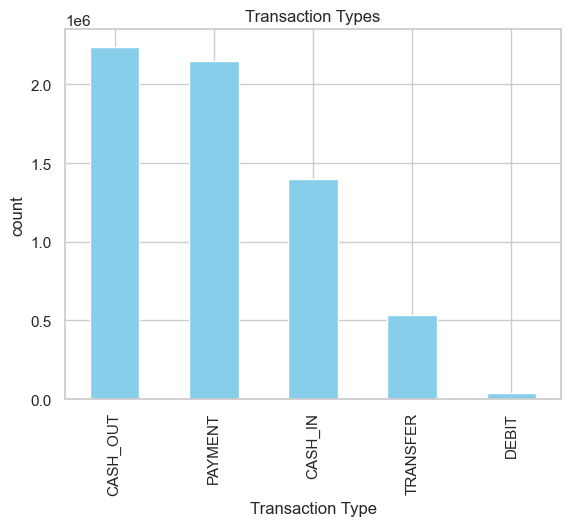

In [10]:
df["type"].value_counts().plot(kind="bar",title="Transaction Types",color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("count")
plt.show()

<Axes: title={'center': 'Fraud Rate by Type'}, xlabel='type'>

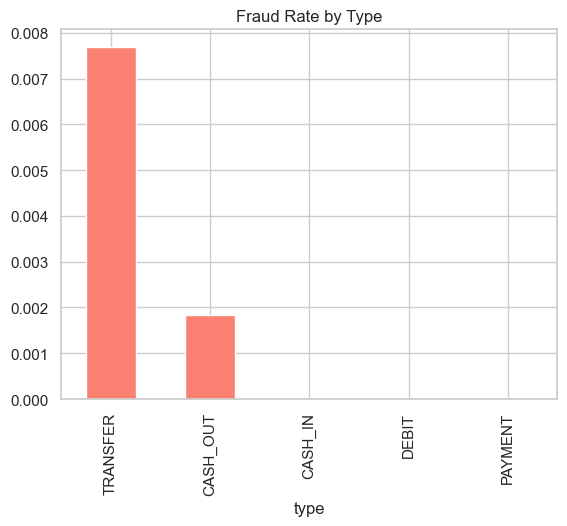

In [11]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type",color="salmon")

In [12]:
fraud_type=df.groupby("type")["isFraud"].mean()
fraud_type

type
CASH_IN     0.000000
CASH_OUT    0.001840
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.007688
Name: isFraud, dtype: float64

In [13]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

Text(0.5, 1.0, 'transaction amount')

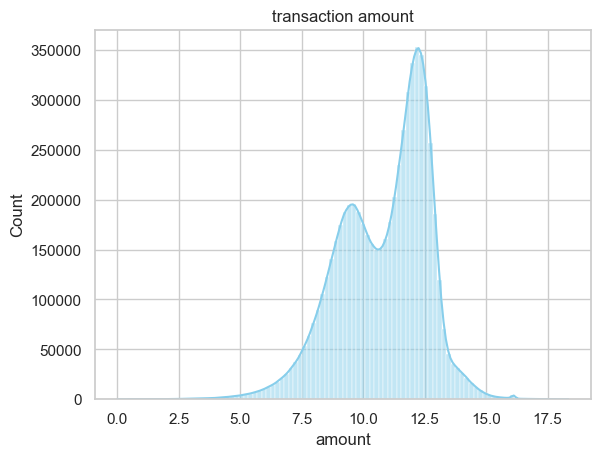

In [14]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True,color="skyblue")
plt.title("transaction amount")

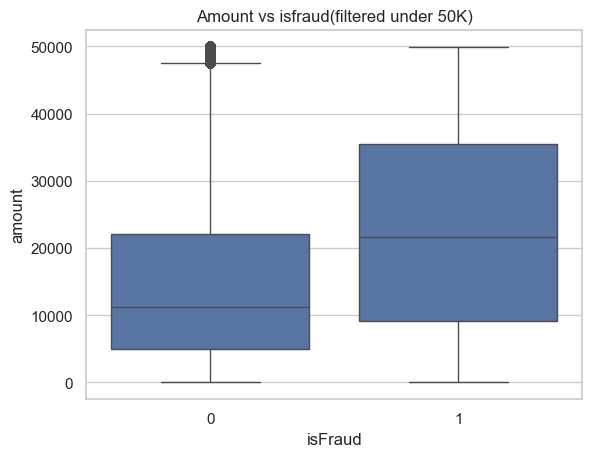

In [15]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud",y="amount")
plt.title("Amount vs isfraud(filtered under 50K)")
plt.show()

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balacediffDist'],
      dtype='object')

In [16]:
df['balanceDiffOrig']=df['oldbalanceOrg']-df['newbalanceOrig']
df['balacediffDist']=df['newbalanceDest']-df['oldbalanceDest']



To check nnegative values in the balance amount

In [17]:
(df['balanceDiffOrig']<0).sum()

1399253

In [18]:
(df['balacediffDist']<0).sum()

1238864

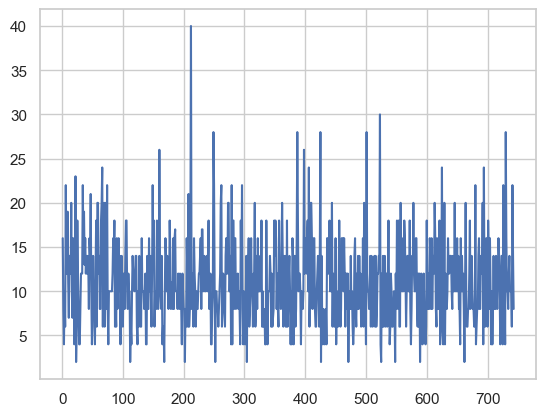

In [19]:
frauds_per_step=df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values,label="Frauds per step")
plt.show()            

Remove unwmated column

In [20]:
df.drop(columns='step',inplace=True)

In [21]:
top_senders=df["nameOrig"].value_counts().head(10)

In [22]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [23]:
top_receivers=df["nameDest"].value_counts().head(10)

In [24]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [25]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [26]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [27]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [28]:
fraud_types

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balacediffDist
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [29]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

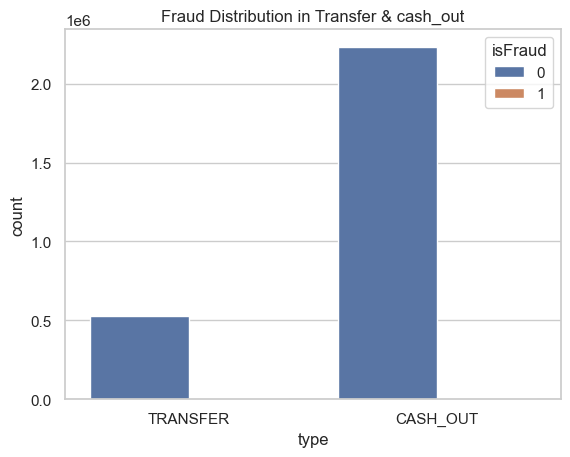

In [30]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")
plt.title("Fraud Distribution in Transfer & cash_out")
plt.show()

find the corrolation

In [31]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [20]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


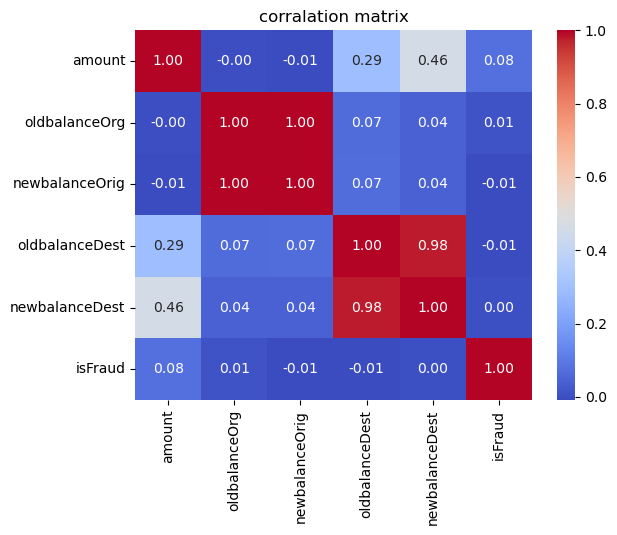

In [22]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("corralation matrix")
plt.show()

In [32]:
zero_after_transfer=df[(df["oldbalanceOrg"]>0)&
                    (df["newbalanceOrig"]==0)&
                    (df["type"].isin(["TRANSFER","CASH_OUT"]))]

In [33]:
zero_after_transfer

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balacediffDist
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from  sklearn.preprocessing import OneHotEncoder


In [35]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [36]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balacediffDist
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [38]:
categorical=["type"]
numerical=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [39]:
y=df_model["isFraud"]
x=df_model.drop("isFraud",axis=1)

In [30]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [31]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrig,balacediffDist
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,9839.64,0.00
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,1864.28,0.00
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,181.00,0.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,181.00,-21182.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,11668.14,0.00
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,339682.13,339682.13
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,6311409.28,0.00
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,6311409.28,6311409.27
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,850002.52,0.00


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [42]:
preprocessor=ColumnTransformer(transformers=[("num",StandardScaler(),numerical),("cat",OneHotEncoder(drop="first"),categorical)],remainder="drop")

In [44]:
pipeline=Pipeline([("prep",preprocessor),("clf",LogisticRegression(class_weight="balanced",max_iter=1000))])


In [45]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [46]:
y_pred=pipeline.predict(x_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [48]:
confusion_matrix(y_test,y_pred)

array([[1802993,  103329],
       [    147,    2317]], dtype=int64)

In [49]:
pipeline.score(x_test,y_test)*100

94.57896275433704

To export the model so that we can use it in web app

In [50]:
import joblib
joblib.dump(pipeline,"Frad_detection_analysis_model.pkl")

['Frad_detection_analysis_model.pkl']